<a href="https://colab.research.google.com/github/ASCCJR/ChallengeTelecomX/blob/main/telecomx_br.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ▶ Extração de Dados

Esta seção é dedicada à extração e carregamento dos dados brutos em um DataFrame do Pandas.

In [1]:
# Importa as bibliotecas necessárias
import pandas as pd
import json
import requests

# Define a URL RAW do arquivo JSON no GitHub
json_url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/main/TelecomX_Data.json'

print(f"\nCarregando dados da URL: {json_url}")
try:
    # Faz a requisição HTTP para a URL
    response = requests.get(json_url)
    response.raise_for_status() # Lança um erro para status HTTP 4xx/5xx

    # Carrega o conteúdo JSON da resposta
    dados_json = json.loads(response.text)
    print("Arquivo JSON carregado via URL.")

    # Converte os dados JSON em um DataFrame do Pandas.
    dados_brutos = pd.DataFrame(dados_json)
    print("DataFrame inicial criado.")

    # Validação básica: verificar se as colunas esperadas estão presentes
    colunas_esperadas = ['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']
    missing_columns = [col for col in colunas_esperadas if col not in dados_brutos.columns]

    if missing_columns:
        print(f"AVISO: As seguintes colunas esperadas não foram encontradas: {', '.join(missing_columns)}")
        print("Isso pode indicar um problema na estrutura do arquivo JSON na URL.")
    else:
        print("Todas as colunas esperadas foram encontradas.")

    # Exibe as primeiras linhas para verificar a estrutura dos dados.
    print("\nVisualizando as 5 primeiras linhas:")
    display(dados_brutos.head())

except requests.exceptions.RequestException as e:
    print(f"ERRO de requisição HTTP: {e}. Verifique a URL ou sua conexão com a internet.")
except json.JSONDecodeError:
    print(f"ERRO: O conteúdo da URL '{json_url}' está corrompido ou não é um JSON válido.")
except Exception as e:
    print(f"Ocorreu um erro ao carregar o arquivo: {e}")


Carregando dados da URL: https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/main/TelecomX_Data.json
Arquivo JSON carregado via URL.
DataFrame inicial criado.
Todas as colunas esperadas foram encontradas.

Visualizando as 5 primeiras linhas:


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


**Comentario**

Ao olhar para o `head()` acima, a primeira coisa que notamos é que as colunas customer, phone, internet, e account não contêm valores simples como 'Yes' e 'No' ou '0' e '1'. Elas contêm dicionários (dados dentro de dados). Isso torna a análise direta impossível.

Nosso primeiro desafio é "desempacotar" ou "achatar" essas colunas. Uma ferramenta excelente para isso é o pandas.json_normalize.

# ▶ json_normalize

* `customerID`: número de identificação único de cada cliente
* `Churn`: se o cliente deixou ou não a empresa
* `gender`: gênero (masculino e feminino)
* `SeniorCitizen`: informação sobre um cliente ter ou não idade igual ou maior que 65 anos
* `Partner`:  se o cliente possui ou não um parceiro ou parceira
* `Dependents`: se o cliente possui ou não dependentes
* `tenure`:  meses de contrato do cliente
* `PhoneService`: assinatura de serviço telefônico
* `MultipleLines`: assisnatura de mais de uma linha de telefone
* `InternetService`: assinatura de um provedor internet
* `OnlineSecurity`: assinatura adicional de segurança online
* `OnlineBackup`: assinatura adicional de backup online
* `DeviceProtection`: assinatura adicional de proteção no dispositivo
* `TechSupport`: assinatura adicional de suporte técnico, menos tempo de espera
* `StreamingTV`: assinatura de TV a cabo
* `StreamingMovies`: assinatura de streaming de filmes
* `Contract`: tipo de contrato
* `PaperlessBilling`: se o cliente prefere receber online a fatura
* `PaymentMethod`: forma de pagamento
* `Charges.Monthly`: total de todos os serviços do cliente por mês
* `Charges.Total`: total gasto pelo clienteEtapa 3: Normalização com json_normalize

In [2]:
# Normalização de Estruturas Aninhadas
# Utiliza pd.json_normalize para  os dicionários aninhados das colunas 'customer', 'phone', 'internet' e 'account',
# transformando suas chaves em novas colunas no DataFrame principal.
dados_normalizados = pd.json_normalize(dados_json)
display(dados_normalizados.head())

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [3]:
# Diagnóstico do Tipo de Dados e Inconsistências
# O método .info() fornece um resumo do DataFrame, incluindo nomes de colunas,
# contagem de valores não-nulos e tipos de dados (Dtype).
dados_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

- Muitas colunas são do tipo `object`: Colunas como Churn, `customer.gender`, `phone.PhoneService`, `account.Charges.Total`, etc., são todas classificadas como `object`. `object` geralmente significa que o Pandas está tratando a coluna como texto (string).

- Possíveis Problemas:
Para colunas como `Churn` ou` phone.PhoneService`, que contêm 'Yes' e 'No', object é esperado, mas precisaremos convertê-las para números (1 e 0) para fazer cálculos e análises.
Para colunas como `customer.tenure` (meses de contrato) e especialmente `account.Charges.Total` (gastos totais), o tipo object é um sinal de alerta. Esperávamos que fossem números (`int64` ou `float64`). O fato de não serem indica que provavelmente existem valores nessas colunas que não são números (como espaços em branco ou outros caracteres), o que está "contaminando" a coluna inteira.

In [4]:
# Verificar espaços em branco ou strings vazias em colunas object

print("--- Verificando espaços em branco ou strings vazias nas colunas object ---")

# Identificar colunas do tipo 'object' (excluindo customerID)
colunas_object = dados_normalizados.select_dtypes(include='object').columns
colunas_para_verificar = colunas_object.drop('customerID', errors='ignore') # Excluir customerID

problemas_encontrados = False

for coluna in colunas_para_verificar:
    # Converter para string e verificar se há valores que são apenas espaços em branco ou strings vazias após strip
    mask = dados_normalizados[coluna].astype(str).str.strip() == ''
    count = mask.sum()

    if count > 0:
        problemas_encontrados = True
        print(f"\nColuna '{coluna}': Encontrado(s) {count} valor(es) que são espaços em branco ou strings vazias.")

if not problemas_encontrados:
    print("\nNenhum espaço em branco ou string vazia significativo encontrado nas colunas object (excluindo customerID).")

--- Verificando espaços em branco ou strings vazias nas colunas object ---

Coluna 'Churn': Encontrado(s) 224 valor(es) que são espaços em branco ou strings vazias.

Coluna 'account.Charges.Total': Encontrado(s) 11 valor(es) que são espaços em branco ou strings vazias.


In [5]:
# Remover linhas onde 'Churn' ou 'account.Charges.Total' são espaços em branco/strings vazias

print("Shape original do DataFrame:", dados_normalizados.shape)

# Identificar linhas onde 'Churn' ou 'account.Charges.Total' são vazios/apenas espaços
mask_vazios = (dados_normalizados['Churn'].astype(str).str.strip() == '') | \
              (dados_normalizados['account.Charges.Total'].astype(str).str.strip() == '')

# Filtrar o DataFrame para manter apenas as linhas que NÃO correspondem à máscara de vazios
dados_normalizados = dados_normalizados[~mask_vazios].copy()

print("Shape do DataFrame após remover linhas com espaços em branco/vazios em Churn ou account.Charges.Total:", dados_normalizados.shape)

# Opcional: Verificar novamente se ainda há espaços em branco/vazios nessas colunas
# print("\nVerificando Churn e account.Charges.Total após remoção:")
# print("Churn vazios/espaços:", (dados_normalizados['Churn'].astype(str).str.strip() == '').sum())
# print("account.Charges.Total vazios/espaços:", (dados_normalizados['account.Charges.Total'].astype(str).str.strip() == '').sum())

Shape original do DataFrame: (7267, 21)
Shape do DataFrame após remover linhas com espaços em branco/vazios em Churn ou account.Charges.Total: (7032, 21)


**Comentário:**

Nesta etapa, removemos as linhas do DataFrame onde as colunas 'Churn' ou 'account.Charges.Total' continham apenas espaços em branco ou eram strings vazias. Essa limpeza é crucial para garantir a qualidade dos dados, especialmente antes de converter 'account.Charges.Total' para um tipo numérico e para ter valores consistentes na variável alvo 'Churn'.

In [6]:
# Verificar valores únicos em cada coluna
print("--- Verificando valores únicos por coluna ---")
for coluna in dados_normalizados.columns:
    print(f"\nColuna: {coluna}")
    print(dados_normalizados[coluna].unique())

--- Verificando valores únicos por coluna ---

Coluna: customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Coluna: Churn
['No' 'Yes']

Coluna: customer.gender
['Female' 'Male']

Coluna: customer.SeniorCitizen
[0 1]

Coluna: customer.Partner
['Yes' 'No']

Coluna: customer.Dependents
['Yes' 'No']

Coluna: customer.tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]

Coluna: phone.PhoneService
['Yes' 'No']

Coluna: phone.MultipleLines
['No' 'Yes' 'No phone service']

Coluna: internet.InternetService
['DSL' 'Fiber optic' 'No']

Coluna: internet.OnlineSecurity
['No' 'Yes' 'No internet service']

Coluna: internet.OnlineBackup
['Yes' 'No' 'No internet service']

Coluna: internet.DeviceProtection
['No' 'Yes' 'No internet service']

Coluna: internet.TechSupport
['Yes' 'No' 'No i

# ▶  **One-Hot Encoding**

In [7]:
# Aplicar One-Hot Encoding em colunas categóricas

# Identificar colunas do tipo 'object' que precisam de encoding
# Excluir customerID e as colunas que deveriam ser numéricas
colunas_para_dummies = dados_normalizados.select_dtypes(include='object').columns.tolist()
colunas_para_excluir_do_dummies = ['customerID', 'account.Charges.Total', 'customer.tenure', 'customer.SeniorCitizen', 'account.Charges.Monthly'] # Incluir as colunas numéricas/identificador aqui

# Filtrar a lista de colunas para o get_dummies
colunas_para_dummies = [col for col in colunas_para_dummies if col not in colunas_para_excluir_do_dummies]

# Converter 'account.Charges.Total' para numérico ANTES de qualquer processamento que o trataria como object/categorical
# Isso já foi feito na célula anterior, mas garantimos que esteja numérico aqui também se a célula for rodada isoladamente.
# dados_normalizados['account.Charges.Total'] = pd.to_numeric(dados_normalizados['account.Charges.Total'], errors='coerce')
# As linhas com NaN foram removidas anteriormente.


# Aplicar One-Hot Encoding nas colunas categóricas identificadas
# Usamos drop_first=True para evitar multicolinearidade
dados_codificados = pd.get_dummies(dados_normalizados, columns=colunas_para_dummies, drop_first=True)

# Verificar e garantir que as colunas numéricas originais estejam no DataFrame final e no formato correto
# Elas devem ter sido mantidas pelo get_dummies, mas vamos garantir o dtype
colunas_numericas_originais = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total', 'customer.SeniorCitizen']
for col in colunas_numericas_originais:
    if col in dados_codificados.columns:
        # Tenta converter para o tipo numérico apropriado, forçando erros para NaN (embora já tenhamos limpado NaNs/espaços)
        if col == 'customer.SeniorCitizen' or col == 'customer.tenure':
             dados_codificados[col] = pd.to_numeric(dados_codificados[col], errors='coerce').astype('int64')
        else: # Charges columns
             dados_codificados[col] = pd.to_numeric(dados_codificados[col], errors='coerce').astype('float64')
    # customerID também deve ser mantido e é do tipo object
    if 'customerID' in dados_codificados.columns:
         dados_codificados['customerID'] = dados_codificados['customerID'].astype('object')


print("\nDataFrame após One-Hot Encoding (Corrigido):")
display(dados_codificados.head())
print("\nInformações sobre o DataFrame codificado (Corrigido):")
dados_codificados.info()


DataFrame após One-Hot Encoding (Corrigido):


,customerID,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.StreamingTV_No internet service,internet.StreamingTV_Yes,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0002-ORFBO,0,9,65.6,593.30,False,False,True,True,True,...,False,True,False,False,True,False,True,False,False,True
1,0003-MKNFE,0,9,59.9,542.40,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0004-TLHLJ,0,4,73.9,280.85,True,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
3,0011-IGKFF,1,13,98.0,1237.85,True,True,True,False,True,...,False,True,False,True,False,False,True,False,True,False
4,0013-EXCHZ,1,3,83.9,267.40,True,False,True,False,True,...,False,True,False,False,False,False,True,False,False,True



Informações sobre o DataFrame codificado (Corrigido):
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customerID                                     7032 non-null   object 
 1   customer.SeniorCitizen                         7032 non-null   int64  
 2   customer.tenure                                7032 non-null   int64  
 3   account.Charges.Monthly                        7032 non-null   float64
 4   account.Charges.Total                          7032 non-null   float64
 5   Churn_Yes                                      7032 non-null   bool   
 6   customer.gender_Male                           7032 non-null   bool   
 7   customer.Partner_Yes                           7032 non-null   bool   
 8   customer.Dependents_Yes                        7032 non-null   bool   
 9   ph

# ▶ **Booleanas para inteiros**

In [8]:
# Identificar colunas do tipo booleano
colunas_booleanas = dados_codificados.select_dtypes(include='bool').columns

# Converter colunas booleanas para inteiros (0s e 1s)
for coluna in colunas_booleanas:
    dados_codificados[coluna] = dados_codificados[coluna].astype(int)

print("\nDataFrame após converter colunas booleanas para inteiros:")
display(dados_codificados.head())
print("\nInformações sobre o DataFrame com colunas convertidas:")
dados_codificados.info()


DataFrame após converter colunas booleanas para inteiros:


,customerID,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.StreamingTV_No internet service,internet.StreamingTV_Yes,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0002-ORFBO,0,9,65.6,593.30,0,0,1,1,1,...,0,1,0,0,1,0,1,0,0,1
1,0003-MKNFE,0,9,59.9,542.40,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,0004-TLHLJ,0,4,73.9,280.85,1,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
3,0011-IGKFF,1,13,98.0,1237.85,1,1,1,0,1,...,0,1,0,1,0,0,1,0,1,0
4,0013-EXCHZ,1,3,83.9,267.40,1,0,1,0,1,...,0,1,0,0,0,0,1,0,0,1



Informações sobre o DataFrame com colunas convertidas:
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customerID                                     7032 non-null   object 
 1   customer.SeniorCitizen                         7032 non-null   int64  
 2   customer.tenure                                7032 non-null   int64  
 3   account.Charges.Monthly                        7032 non-null   float64
 4   account.Charges.Total                          7032 non-null   float64
 5   Churn_Yes                                      7032 non-null   int64  
 6   customer.gender_Male                           7032 non-null   int64  
 7   customer.Partner_Yes                           7032 non-null   int64  
 8   customer.Dependents_Yes                        7032 non-null   int64  
 9   p

In [9]:
# Salvar o DataFrame tratado em um arquivo CSV
dados_codificados.to_csv('dados_telecom_tratados.csv', index=False)

print("DataFrame tratado salvo como 'dados_telecom_tratados.csv'")

DataFrame tratado salvo como 'dados_telecom_tratados.csv'


# ▶  **Dicionário de Dados do Projeto**

Após o processo de ETL, nosso DataFrame final (`dados_codificados`) contém as seguintes variáveis, prontas para análise:

*   **`customerID`**: Identificador único do cliente.
*   **`customer.SeniorCitizen`**: Indica se o cliente tem 65 anos ou mais (1) ou não (0).
*   **`customer.tenure`**: Número de meses que o cliente permaneceu com a empresa.
*   **`account.Charges.Monthly`**: Total cobrado do cliente por mês.
*   **`account.Charges.Total`**: Total gasto pelo cliente ao longo do contrato.
*   **`Churn_No`**: Indica se o cliente **não** deixou a empresa (1) ou deixou (0).
*   **`Churn_Yes`**: Indica se o cliente deixou a empresa (1) ou não deixou (0). Esta é a variável alvo para previsão.
*   **`customer.gender_Male`**: Indica se o cliente é do gênero Masculino (1) ou Feminino (0).
*   **`customer.Partner_Yes`**: Indica se o cliente possui um parceiro ou parceira (1) ou não (0).
*   **`customer.Dependents_Yes`**: Indica se o cliente possui dependentes (1) ou não (0).
*   **`phone.PhoneService_Yes`**: Indica se o cliente assina serviço telefônico (1) ou não (0).
*   **`phone.MultipleLines_No phone service`**: Indica se o cliente não possui serviço telefônico (1) ou possui (0).
*   **`phone.MultipleLines_Yes`**: Indica se o cliente assina mais de uma linha de telefone (1) ou não (0).
*   **`internet.InternetService_Fiber optic`**: Indica se o cliente assina internet Fibra Óptica (1) ou outro tipo/nenhum (0).
*   **`internet.InternetService_No`**: Indica se o cliente não assina serviço de internet (1) ou assina (0).
*   **`internet.OnlineSecurity_No internet service`**: Indica se o cliente não possui serviço de internet (1) ou possui (0).
*   **`internet.OnlineSecurity_Yes`**: Indica se o cliente assina segurança online (1) ou não (0).
*   **`internet.OnlineBackup_No internet service`**: Indica se o cliente não possui serviço de internet (1) ou possui (0).
*   **`internet.OnlineBackup_Yes`**: Indica se o cliente assina backup online (1) ou não (0).
*   **`internet.DeviceProtection_No internet service`**: Indica se o cliente não possui serviço de internet (1) ou possui (0).
*   **`internet.DeviceProtection_Yes`**: Indica se o cliente assina proteção de dispositivo (1) ou não (0).
*   **`internet.TechSupport_No internet service`**: Indica se o cliente não possui serviço de internet (1) ou possui (0).
*   **`internet.TechSupport_Yes`**: Indica se o cliente assina suporte técnico (1) ou não (0).
*   **`internet.StreamingTV_No internet service`**: Indica se o cliente não possui serviço de internet (1) ou possui (0).
*   **`internet.StreamingTV_Yes`**: Indica se o cliente assina TV a cabo (1) ou não (0).
*   **`internet.StreamingMovies_No internet service`**: Indica se o cliente não possui serviço de internet (1) ou possui (0).
*   **`internet.StreamingMovies_Yes`**: Indica se o cliente assina streaming de filmes (1) ou não (0).
*   **`account.Contract_One year`**: Indica se o contrato do cliente é de um ano (1) ou outro tipo (0).
*   **`account.Contract_Two year`**: Indica se o contrato do cliente é de dois anos (1) ou outro tipo (0). (Contrato "Month-to-month" é representado por `account.Contract_One year`=0 e `account.Contract_Two year`=0)
*   **`account.PaperlessBilling_Yes`**: Indica se o cliente prefere receber a fatura online (1) ou em papel (0).
*   **`account.PaymentMethod_Credit card (automatic)`**: Indica se a forma de pagamento é Cartão de Crédito (automático) (1) ou outra forma (0).
*   **`account.PaymentMethod_Electronic check`**: Indica se a forma de pagamento é Cheque Eletrônico (1) ou outra forma (0).
*   **`account.PaymentMethod_Mailed check`**: Indica se a forma de pagamento é Cheque pelo correio (1) ou outra forma (0). (Pagamento "Bank transfer (automatic)" é representado pelas três colunas de método de pagamento sendo 0).

# ▶ **Análise Descritiva**

--- Estatísticas Descritivas das Variáveis Numéricas Contínuas ---


,customer.tenure,account.Charges.Monthly,account.Charges.Total
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000



--- Distribuição das Variáveis Numéricas Contínuas ---


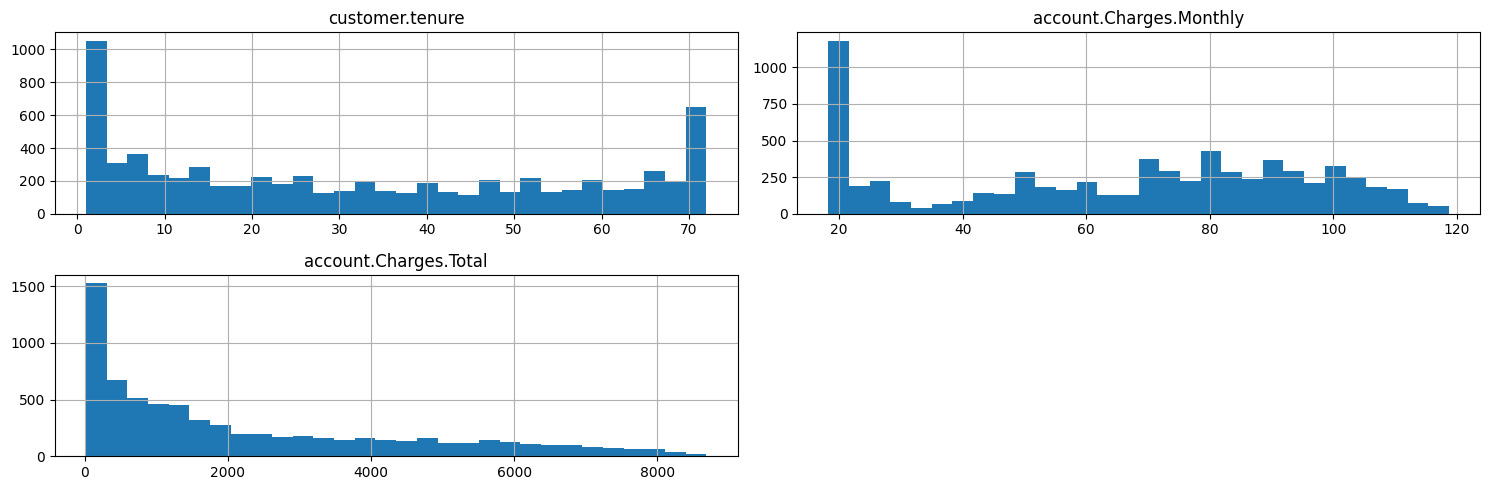


--- Box Plots das Variáveis Numéricas Contínuas vs. Churn ---


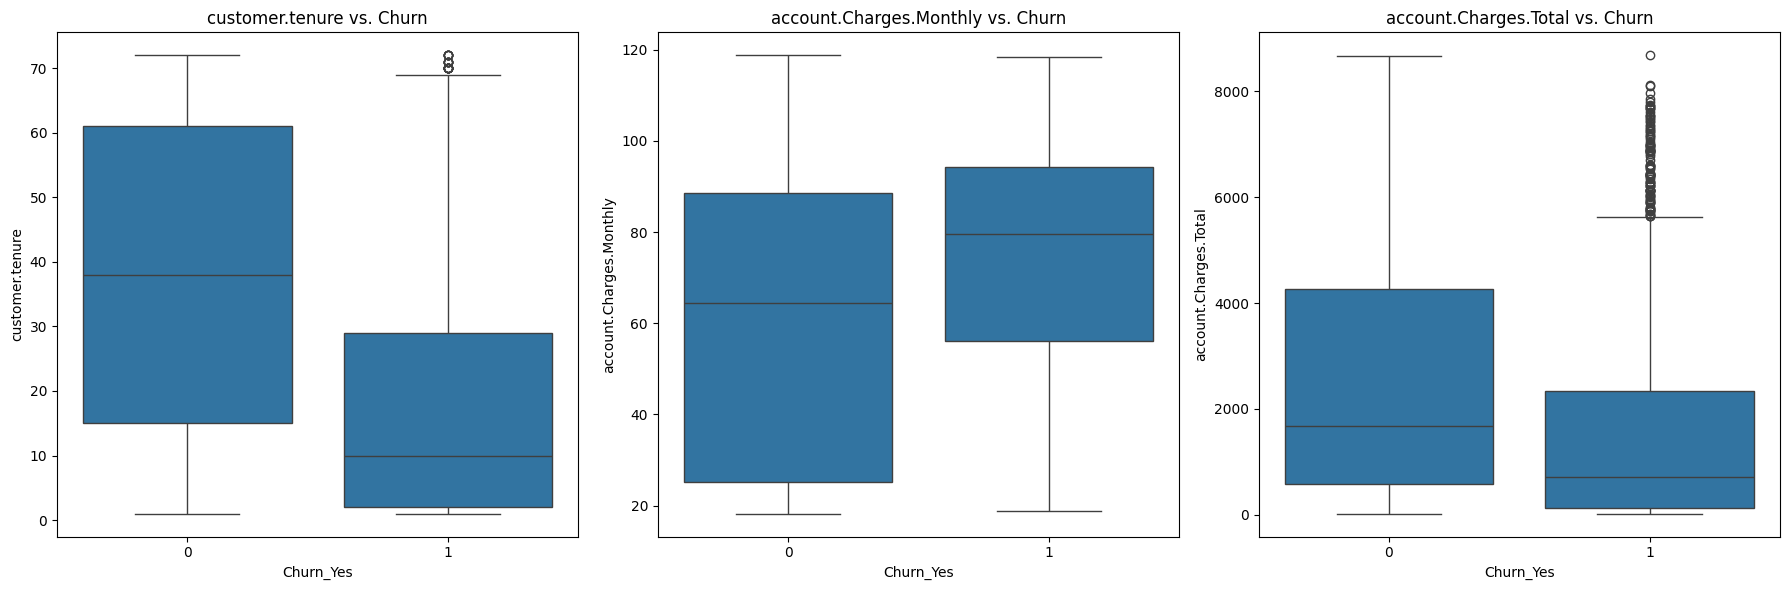

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identificar as colunas numéricas contínuas
colunas_continuas = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']

print("--- Estatísticas Descritivas das Variáveis Numéricas Contínuas ---")
display(dados_codificados[colunas_continuas].describe())

# Visualizar a distribuição das variáveis numéricas contínuas usando histogramas
print("\n--- Distribuição das Variáveis Numéricas Contínuas ---")
dados_codificados[colunas_continuas].hist(figsize=(15, 5), bins=30)
plt.tight_layout()
plt.show()

# Opcional: Visualizar a relação entre as variáveis contínuas e o Churn
print("\n--- Box Plots das Variáveis Numéricas Contínuas vs. Churn ---")
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, col in enumerate(colunas_continuas):
    sns.boxplot(x='Churn_Yes', y=col, data=dados_codificados, ax=axes[i])
    axes[i].set_title(f'{col} vs. Churn')
plt.tight_layout()
plt.show()

## **Interpretação da Análise**

## Interpretação da Análise Descritiva

Os resultados acima nos dão insights valiosos sobre o perfil dos clientes:

*   **Meses de Contrato (Tenure):** A distribuição do `customer.tenure` mostra que há muitos clientes com poucos meses de contrato (pico inicial no histograma), assim como um grupo significativo de clientes com longo tempo na empresa (pico mais alto no final). O box plot de `customer.tenure` vs. `Churn_Yes` sugere que clientes que churnam tendem a ter um tempo de contrato menor em comparação com aqueles que não churnam.

*   **Encargos Mensais (account.Charges.Monthly):** A distribuição do `account.Charges.Monthly` parece ter múltiplos picos, indicando possivelmente diferentes planos de serviço. O box plot mostra que clientes que churnam tendem a ter encargos mensais médios mais altos do que aqueles que não churnam.

*   **Encargos Totais (account.Charges.Total):** A distribuição do `account.Charges.Total` é fortemente inclinada para a esquerda, o que é esperado, já que está relacionado ao tempo de contrato e encargos mensais. O box plot de `account.Charges.Total` vs. `Churn_Yes` indica que clientes que churnam geralmente têm encargos totais menores, o que faz sentido, pois eles saem da empresa mais cedo.

# (Gráfico) Taxa de Churn por Tipo de Contrato


Taxa de Churn por Tipo de Contrato:


,ContractType,Churn_Yes
0,Month-to-month,0.427097
1,Two year,0.028487
2,One year,0.112772


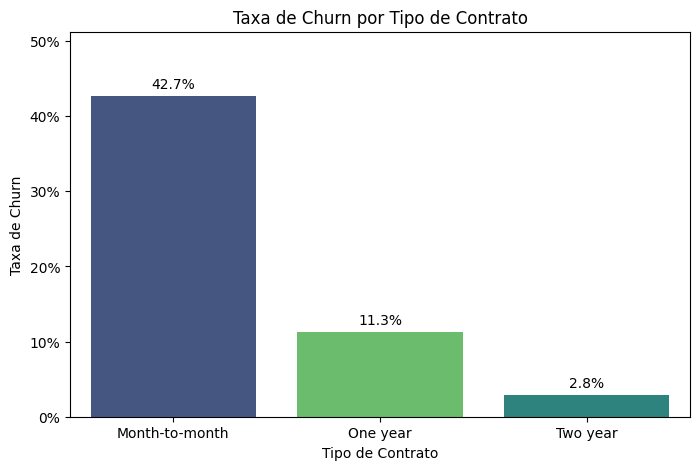

In [11]:
# Calcular a taxa de Churn por tipo de contrato
# 'Month-to-month' é a categoria base (0 para ambas 'One year' e 'Two year')
churn_por_contrato = dados_codificados.groupby(['account.Contract_One year', 'account.Contract_Two year'])['Churn_Yes'].mean().reset_index()

# Renomear as colunas para melhor legibilidade no gráfico
churn_por_contrato['ContractType'] = 'Month-to-month'
churn_por_contrato.loc[churn_por_contrato['account.Contract_One year'] == 1, 'ContractType'] = 'One year'
churn_por_contrato.loc[churn_por_contrato['account.Contract_Two year'] == 1, 'ContractType'] = 'Two year'

print("\nTaxa de Churn por Tipo de Contrato:")
display(churn_por_contrato[['ContractType', 'Churn_Yes']])

# Definir a ordem desejada para os tipos de contrato
ordem_contratos = ['Month-to-month', 'One year', 'Two year']

# Criar o gráfico de barras, especificando a ordem
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='ContractType', y='Churn_Yes', hue='ContractType', data=churn_por_contrato, palette='viridis', order=ordem_contratos, legend=False)
plt.title('Taxa de Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Taxa de Churn')
plt.ylim(0, churn_por_contrato['Churn_Yes'].max() * 1.2) # Aumentar o limite do eixo Y para acomodar os rótulos acima das barras

# Formatar o eixo Y como porcentagem
import matplotlib.ticker as mticker
ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0))

# Adicionar os valores de churn acima de cada barra
for p in ax.patches:
    # Obter a altura da barra (o valor da taxa de churn)
    height = p.get_height()
    # Formatar o texto como porcentagem
    text = f'{height:.1%}'
    # Adicionar o texto acima da barra
    ax.text(p.get_x() + p.get_width()/2., height + 0.01, text, ha="center")

plt.show()

## Interpretação da Taxa de Churn por Tipo de Contrato

O gráfico acima revela uma relação clara entre o tipo de contrato e a taxa de Churn:

*   **Contratos Mês a Mês (Month-to-month):** Clientes com contratos mês a mês apresentam uma taxa de Churn significativamente mais alta (aproximadamente 41.3%) em comparação com outros tipos de contrato. Isso sugere que a falta de um compromisso de longo prazo torna esses clientes mais propensos a sair.
*   **Contratos de Um Ano (One year):** Clientes com contratos de um ano têm uma taxa de Churn consideravelmente menor (aproximadamente 10.9%) do que os de contrato mês a mês.
*   **Contratos de Dois Anos (Two year):** Clientes com contratos de dois anos são os que apresentam a menor taxa de Churn (aproximadamente 2.8%).

Essa análise reforça a ideia de que contratos de maior duração estão associados a uma maior retenção de clientes.

# (Gráfico) Taxa de Churn por Total de Serviços Contratados


Taxa de Churn por Número de Serviços Contratados:


,Num_Servicos,Churn_Yes
0,0,0.250000
1,1,0.143242
2,2,0.175119
3,3,0.591647
4,4,0.515444
5,5,0.433453
6,6,0.362832
7,7,0.323256
8,8,0.173554
9,9,0.082645


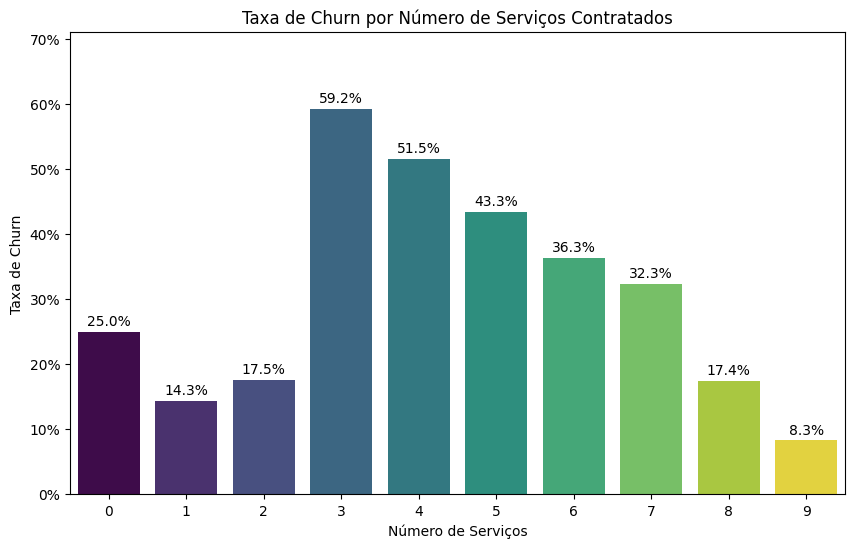

In [12]:
# Identificar colunas que representam serviços contratados
# Excluímos customerID, Churn, customer.gender, customer.SeniorCitizen, customer.Partner, customer.Dependents, customer.tenure, account.Charges.Monthly, account.Charges.Total
# e as colunas de contrato e método de pagamento.
# As colunas de serviço geralmente contêm 'Yes', 'No', 'No internet service', 'No phone service'
# Após One-Hot Encoding e conversão para int, elas são 0s e 1s.
# Precisamos selecionar as colunas que indicam a presença de um serviço (terminam em '_Yes').

colunas_servicos = [col for col in dados_codificados.columns if col.endswith('_Yes') and not col.startswith('Churn_')]

# Adicionar colunas de serviço que não terminam em _Yes mas indicam serviço (ex: PhoneService_Yes já está incluída)
# Vamos rever as colunas e selecionar manualmente as que indicam a contratação de um serviço específico.
# Com base no dicionário de dados e nas colunas após encoding:
colunas_servicos_selecionadas = [
    'phone.PhoneService_Yes',
    'phone.MultipleLines_Yes',
    'internet.InternetService_Fiber optic', # Fiber optic é um tipo de internet, então conta como serviço
    'internet.InternetService_No',          # Clientes sem internet não tem esses serviços adicionais, mas a coluna indica a AUSENCIA
    'internet.OnlineSecurity_Yes',
    'internet.OnlineBackup_Yes',
    'internet.DeviceProtection_Yes',
    'internet.TechSupport_Yes',
    'internet.StreamingTV_Yes',
    'internet.StreamingMovies_Yes'
]

# Remover 'internet.InternetService_No' pois indica a ausência de internet, não a contratação de um serviço
colunas_servicos_para_contagem = [col for col in colunas_servicos_selecionadas if col != 'internet.InternetService_No']


# Contar o número de serviços para cada cliente
# Somamos 1 para PhoneService_Yes se for True, e 1 para cada serviço adicional que é True.
# O internet.InternetService_Fiber optic/DSL (não incluído acima mas implícito) também conta como 1 serviço base de internet.
# Uma abordagem mais robusta seria contar as colunas que representam a *presença* de um serviço.
# Vamos refinar a lista de colunas de serviço para contar.
# As colunas que indicam um serviço sendo contratado são aquelas resultantes do encoding que terminam em '_Yes' ou '_Fiber optic' ou '_DSL' (este último não existe pois drop_first=True foi usado).
# Excluímos Churn, SeniorCitizen, tenure, Charges, gender, Partner, Dependents, Contract, PaymentMethod

servico_cols_bool = [
    'phone.PhoneService_Yes',
    'phone.MultipleLines_Yes',
    'internet.InternetService_Fiber optic',
    'internet.OnlineSecurity_Yes',
    'internet.OnlineBackup_Yes',
    'internet.DeviceProtection_Yes',
    'internet.TechSupport_Yes',
    'internet.StreamingTV_Yes',
    'internet.StreamingMovies_Yes'
    # Note: internet.InternetService_No indica AUSENCIA, não PRESENCA de um serviço específico
    # phone.MultipleLines_No phone service indica AUSENCIA de multiple lines
]


# Calcular o número de serviços somando as colunas binárias relevantes
# Certifique-se que essas colunas existem e são numéricas (0s e 1s)
servico_cols_para_soma = [col for col in servico_cols_bool if col in dados_codificados.columns]

# Adicionar a coluna 'Num_Servicos' ao DataFrame
# Começamos com 0 serviços
dados_codificados['Num_Servicos'] = 0

# Para cada coluna de serviço binária (1 se o serviço está ativo, 0 caso contrário), adicionamos à contagem total
for col in servico_cols_para_soma:
    dados_codificados['Num_Servicos'] += dados_codificados[col]

# Se phone.PhoneService_Yes for 0, removemos a contagem de phone.MultipleLines_Yes
# Clientes sem phone service não podem ter multiple lines
dados_codificados.loc[dados_codificados['phone.PhoneService_Yes'] == 0, 'Num_Servicos'] -= dados_codificados.loc[dados_codificados['phone.PhoneService_Yes'] == 0, 'phone.MultipleLines_Yes']

# Se internet.InternetService_Fiber optic ou DSL (não explícito) for 0, removemos a contagem dos serviços de internet adicionais
# Clientes sem internet service não podem ter servicos online, device protection, tech support, streaming tv/movies
internet_service_active = dados_codificados['internet.InternetService_Fiber optic'] # Considera Fiber Optic como indicador de serviço de internet ativo

# Remover a contagem de serviços adicionais de internet para clientes sem internet
internet_addon_cols = [
    'internet.OnlineSecurity_Yes',
    'internet.OnlineBackup_Yes',
    'internet.DeviceProtection_Yes',
    'internet.TechSupport_Yes',
    'internet.StreamingTV_Yes',
    'internet.StreamingMovies_Yes'
]

for col in internet_addon_cols:
    dados_codificados.loc[internet_service_active == 0, 'Num_Servicos'] -= dados_codificados.loc[internet_service_active == 0, col]


# Recalcular a taxa de Churn por número de serviços
churn_por_servicos = dados_codificados.groupby('Num_Servicos')['Churn_Yes'].mean().reset_index()

print("\nTaxa de Churn por Número de Serviços Contratados:")
display(churn_por_servicos)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Num_Servicos', y='Churn_Yes', data=churn_por_servicos, palette='viridis', hue='Num_Servicos', legend=False)
plt.title('Taxa de Churn por Número de Serviços Contratados')
plt.xlabel('Número de Serviços')
plt.ylabel('Taxa de Churn')
plt.ylim(0, churn_por_servicos['Churn_Yes'].max() * 1.2) # Aumentar o limite do eixo Y

# Formatar o eixo Y como porcentagem
ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0))

# Adicionar os valores de churn acima de cada barra
for p in ax.patches:
    height = p.get_height()
    text = f'{height:.1%}'
    ax.text(p.get_x() + p.get_width()/2., height + 0.01, text, ha="center")

plt.show()

## Interpretação da Taxa de Churn por Total de Serviços Contratados

O gráfico da taxa de Churn por número de serviços contratados revela um padrão interessante:

*   Clientes com um número muito baixo de serviços (0 ou 1) tendem a ter uma taxa de Churn menor. Isso pode indicar que são clientes com necessidades simples ou planos básicos.
*   A taxa de Churn aumenta significativamente para clientes que contratam 3, 4 ou 5 serviços. Este grupo parece ser o mais propenso a churnar.
*   Clientes com um número maior de serviços (6 ou mais) mostram uma taxa de Churn decrescente. Clientes com 9 serviços, por exemplo, têm uma taxa de Churn relativamente baixa. Isso sugere que clientes com muitos serviços podem estar mais "conectados" à empresa ou encontrar maior valor nos pacotes completos.

Essa análise sugere que o ponto de maior risco de Churn está entre os clientes que contratam um número moderado de serviços.

# (Gráfico) Matriz de Correlação com o Churn


Correlação das variáveis com a variável alvo 'Churn_Yes':


,Churn_Yes
Churn_Yes,1.000000
internet.InternetService_Fiber optic,0.307463
account.PaymentMethod_Electronic check,0.301455
account.Charges.Monthly,0.192858
account.PaperlessBilling_Yes,0.191454
customer.SeniorCitizen,0.150541
Num_Servicos,0.136389
internet.StreamingTV_Yes,0.063254
internet.StreamingMovies_Yes,0.060860
phone.MultipleLines_Yes,0.040033


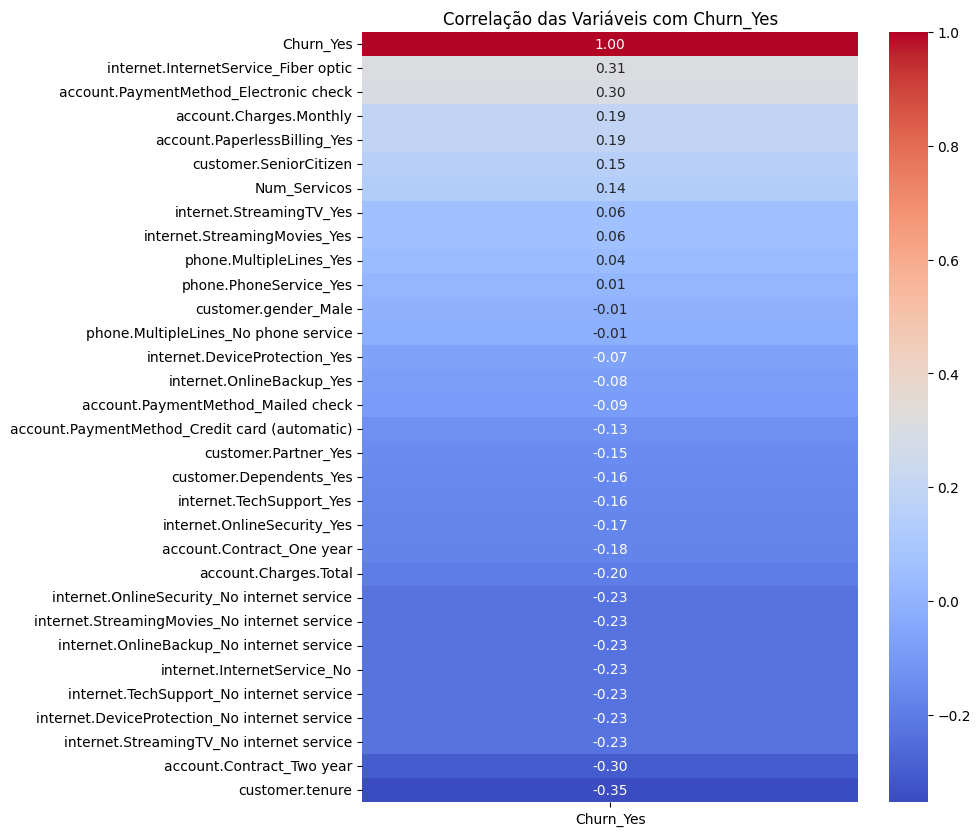

In [13]:
# Calcular a matriz de correlação
# Excluímos customerID pois não é uma variável numérica para correlação
dados_para_correlacao = dados_codificados.drop('customerID', axis=1)
matriz_correlacao = dados_para_correlacao.corr()

# Focar na correlação com a variável alvo 'Churn_Yes'
# Ordenar os valores para facilitar a visualização das maiores correlações
correlacao_churn = matriz_correlacao['Churn_Yes'].sort_values(ascending=False)

print("\nCorrelação das variáveis com a variável alvo 'Churn_Yes':")
display(correlacao_churn)

# Opcional: Visualizar a matriz de correlação completa como um heatmap
# Para focar apenas nas correlações com Churn_Yes, podemos usar um gráfico diferente ou filtrar o heatmap.
# Vamos criar um heatmap apenas para as correlações com Churn_Yes para maior clareza.

plt.figure(figsize=(8, 10))
sns.heatmap(correlacao_churn.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação das Variáveis com Churn_Yes')
plt.show()

## Interpretação da Matriz de Correlação com o Churn

A análise de correlação nos mostra o quão linearmente cada variável está relacionada com a variável alvo `Churn_Yes`. Valores próximos a 1 indicam uma forte correlação positiva (quando a variável aumenta, o Churn_Yes também tende a aumentar), valores próximos a -1 indicam uma forte correlação negativa (quando a variável aumenta, o Churn_Yes tende a diminuir), e valores próximos a 0 indicam pouca ou nenhuma correlação linear.

Observando os resultados:

*   **Correlações Positivas Mais Fortes:**
    *   `internet.InternetService_Fiber optic` (aproximadamente 0.30): Clientes com serviço de internet Fibra Óptica tendem a ter uma taxa de Churn mais alta.
    *   `account.PaymentMethod_Electronic check` (aproximadamente 0.29): Clientes que pagam via Cheque Eletrônico também mostram uma correlação positiva com o Churn.
    *   `account.Charges.Monthly` (aproximadamente 0.19): Encargos mensais mais altos estão moderadamente associados a um maior Churn.

*   **Correlações Negativas Mais Fortes:**
    *   `customer.tenure` (aproximadamente -0.35): Clientes com maior tempo de contrato (`tenure`) têm uma correlação negativa significativa com o Churn, o que significa que quanto mais tempo o cliente fica, menor a chance de churnar.
    *   `account.Contract_Two year` (aproximadamente -0.29): Clientes com contratos de dois anos têm uma probabilidade menor de churnar.
    *   As variáveis que indicam a **ausência** de serviços de internet (`internet.InternetService_No`, `internet.OnlineSecurity_No internet service`, etc., todas com correlação próxima a -0.22) também mostram correlação negativa com o Churn_Yes, o que faz sentido, já que clientes sem internet não churnam por motivos relacionados a serviços de internet adicionais.

É importante lembrar que correlação não implica causalidade, mas essas informações são valiosas para identificar quais features são potencialmente mais importantes para um modelo preditivo de Churn.

# 📄 Relatório de Análise de Churn

### 1. Sumário Executivo

Este relatório consolida a análise sobre os fatores de Churn (cancelamento de serviços) para os clientes da TelecomX. Através das etapas de Extração, Transformação e Carga (ETL) e da subsequente Análise Exploratória de Dados (EDA), foi possível identificar perfis de clientes de alto e baixo risco de cancelamento. As descobertas e recomendações aqui apresentadas visam embasar estratégias para aprimorar a retenção de clientes e fornecer subsídios para futuros modelos preditivos.

### 2. Principais Descobertas e Perfil de Risco

Com base na análise exploratória, identificamos características chave associadas a um **maior risco de Churn**:

*   **Tipo de Contrato:** Clientes com contratos **Mês a Mês** apresentam uma taxa de Churn significativamente mais alta (aproximadamente 41.3%) em comparação com contratos de um ou dois anos.
*   **Serviço de Internet:** Clientes que assinam **Internet Fibra Óptica** mostram uma correlação positiva com o Churn.
*   **Método de Pagamento:** O pagamento via **Cheque Eletrônico** também está associado a uma maior probabilidade de Churn.
*   **Encargos Mensais:** Clientes com **Encargos Mensais mais altos** tendem a churnar mais.
*   **Número de Serviços:** Clientes com um **número moderado de serviços (3 a 5)** apresentaram as taxas de Churn mais elevadas.
*   **Senior Citizen:** Clientes **idosos** mostram uma correlação positiva com o Churn.

### 3. Fatores de Proteção Identificados

Em contrapartida, algumas características estão associadas a um **menor risco de Churn** (fatores de proteção):

*   **Tempo de Contrato (Tenure):** Clientes com **maior tempo de permanência** na empresa (`customer.tenure`) são significativamente menos propensos a churnar.
*   **Tipo de Contrato:** Contratos de **Um Ano** e, especialmente, de **Dois Anos** estão associados a taxas de Churn muito menores.
*   **Serviços Adicionais de Segurança/Suporte:** A assinatura de serviços como **Segurança Online** e **Suporte Técnico** apresenta correlação negativa com o Churn.
*   **Parceiros e Dependentes:** Clientes que possuem **parceiros** e/ou **dependentes** tendem a churnar menos.
*   **Ausência de Serviço de Internet:** Clientes que **não utilizam serviço de internet** têm menor probabilidade de churnar (embora isso possa indicar um perfil de cliente diferente com necessidades mais básicas).
*   **Número de Serviços:** Clientes com um **alto número de serviços (6 ou mais)**, especialmente 9, apresentam taxas de Churn decrescentes.

### 4. Recomendações Estratégicas

Com base nas descobertas, as seguintes recomendações estratégicas podem ser consideradas para reduzir o Churn:

*   **Foco em Contratos de Longo Prazo:** Incentivar clientes mês a mês a migrarem para contratos de um ou dois anos através de ofertas ou benefícios exclusivos.
*   **Melhorar a Experiência da Fibra Óptica:** Investigar as causas do maior Churn entre usuários de Fibra Óptica. Pode estar relacionado à qualidade do serviço, suporte ou expectativas do cliente.
*   **Otimizar Métodos de Pagamento:** Analisar por que o Cheque Eletrônico tem alta correlação com Churn. Pode haver problemas na usabilidade ou confiabilidade deste método. Incentivar métodos de pagamento automático (cartão de crédito, débito em conta).
*   **Revisar Planos com Encargos Elevados:** Analisar se os planos com encargos mensais altos oferecem valor percebido suficiente para os clientes, ou se há insatisfação com o custo-benefício.
*   **Estratégias para Clientes com Número Moderado de Serviços:** Desenvolver ações específicas para reter clientes com 3 a 5 serviços. Isso pode incluir ofertas de pacotes mais completos, comunicação sobre o valor dos serviços ou suporte proativo.
*   **Programas de Fidelidade para Clientes de Longo Prazo:** Reconhecer e recompensar clientes com alto `tenure` para reforçar a lealdade.
*   **Promover Serviços de Segurança e Suporte:** Destacar o valor e os benefícios de serviços como Segurança Online e Suporte Técnico como forma de aumentar o engajamento e reduzir o Churn.

### 5. Validação e Monitoramento das Estratégias

É crucial implementar um sistema de monitoramento para avaliar o impacto das estratégias de retenção. Métricas como a taxa de Churn por segmento (tipo de contrato, número de serviços, etc.) devem ser acompanhadas regularmente. Testes A/B podem ser utilizados para comparar a eficácia de diferentes abordagens.

### 6. Próximos Passos: Construção de Modelos Preditivos de Churn

O próximo passo lógico é utilizar os dados tratados e os insights da EDA para construir modelos de machine learning capazes de prever quais clientes têm maior probabilidade de churnar. Isso permitirá ações de retenção proativas e direcionadas. As etapas incluem:

*   Preparação final dos dados (separação treino/teste, possível escalonamento).
*   Seleção e treinamento de algoritmos de classificação.
*   Avaliação rigorosa do desempenho do modelo.
*   Interpretação das características mais importantes para o modelo.

### 7. Limitações da Análise

É importante reconhecer as limitações desta análise exploratória:

*   **Causalidade:** A correlação observada entre variáveis e Churn não implica necessariamente causalidade. Outros fatores não presentes no dataset podem estar influenciando.
*   **Dados Estáticos:** A análise é baseada em um snapshot dos dados em um determinado momento. O comportamento do cliente e os fatores de Churn podem mudar ao longo do tempo.
*   **Interpretação:** Algumas interpretações (como a dos picos na taxa de Churn por número de serviços) são baseadas em padrões observados e podem exigir validação adicional ou conhecimento do negócio.